In [17]:
import pandas as pd

df = pd.read_csv("/Users/maitrychauhan/Desktop/stockdata/stocks_appended.csv")

In [18]:
df

,Unnamed: 0,avg_vol_3m,change,company_name,last_price,market_cap,pe_ratio_ttm,percent_change,sector_name,symbol,...,Feb_1_2020,Jan_1_2020,Dec_1_2019,Nov_1_2019,Oct_1_2019,Sep_1_2019,Aug_1_2019,Jul_1_2019,Jun_1_2019,May_1_2019
0,0,3.424M,-4.39,Berkshire Hathaway Inc.,401.5635,868481433600,9.07,-1.08%,Financial Services,BRK-B,...,206.34,224.43,226.50,220.30,212.58,208.02,203.41,205.43,213.17,197.42
1,1,8.914M,-1.69,JPMorgan Chase & Co.,191.3900,549689327616,11.55,-0.88%,Financial Services,JPM,...,116.11,132.36,139.40,131.76,124.92,117.69,109.86,116.00,111.80,105.96
2,2,6.041M,-4.25,Visa Inc.,270.7700,554022469632,30.29,-1.55%,Financial Services,V,...,181.76,198.97,187.90,184.51,178.86,172.01,180.82,178.00,173.55,161.33
3,3,2.41M,-5.07,Mastercard Incorporated,457.4318,426734485504,38.63,-1.10%,Financial Services,MA,...,290.25,315.94,298.59,292.23,276.81,271.57,281.37,272.27,264.53,251.49
4,4,40.791M,-0.77,Bank of America Corporation,37.5500,295400964096,12.95,-2.01%,Financial Services,BAC,...,28.50,32.83,35.22,33.32,31.27,29.17,27.51,30.68,29.00,26.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,1070,"495,670",-7.20,"EPAM Systems, Inc.",237.8000,13774802944,33.68,-2.94%,Technology,EPAM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1071,1071,3.934M,-0.47,"Dynatrace, Inc.",46.2700,13695874048,70.11,-1.01%,Technology,DT,...,32.30,31.31,25.30,26.57,20.23,18.67,22.98,NaN,NaN,NaN
1072,1072,4.176M,-7.06,"Enphase Energy, Inc.",100.1050,13620587520,51.60,-6.59%,Technology,ENPH,...,48.97,31.52,26.13,21.87,19.43,22.23,29.67,28.15,18.23,15.17
1073,1073,4.419M,-0.34,Gen Digital Inc.,20.4850,13047102464,9.27,-1.66%,Technology,GEN,...,19.03,28.42,25.52,24.90,22.88,23.63,23.25,21.56,21.76,18.73


In [19]:
fields = [
    "Apr_1_2024",
    "Mar_1_2024",
    "Feb_1_2024",
    "Jan_1_2024",
    "Dec_1_2023",
    "Nov_1_2023",
    "Oct_1_2023",
    "Sep_1_2023",
    "Aug_1_2023",
    "Jul_1_2023",
    "Jun_1_2023",
    "May_1_2023",
    "Apr_1_2023",
    "Mar_1_2023",
    "Feb_1_2023",
    "Jan_1_2023",
    "Dec_1_2022",
    "Nov_1_2022",
    "Oct_1_2022",
    "Sep_1_2022",
    "Aug_1_2022",
    "Jul_1_2022",
    "Jun_1_2022",
    "May_1_2022",
    "Apr_1_2022",
    "Mar_1_2022",
    "Feb_1_2022",
    "Jan_1_2022",
    "Dec_1_2021",
    "Nov_1_2021",
    "Oct_1_2021",
    "Sep_1_2021",
    "Aug_1_2021",
    "Jul_1_2021",
    "Jun_1_2021",
    "May_1_2021",
    "Apr_1_2021",
    "Mar_1_2021",
    "Feb_1_2021",
    "Jan_1_2021",
    "Dec_1_2020",
    "Nov_1_2020",
    "Oct_1_2020",
    "Sep_1_2020",
    "Aug_1_2020",
    "Jul_1_2020",
    "Jun_1_2020",
    "May_1_2020",
    "Apr_1_2020",
    "Mar_1_2020",
    "Feb_1_2020",
    "Jan_1_2020",
    "Dec_1_2019",
    "Nov_1_2019",
    "Oct_1_2019",
    "Sep_1_2019",
    "Aug_1_2019",
    "Jul_1_2019",
    "Jun_1_2019",
    "May_1_2019"
]


In [21]:
for col in fields:
    df[col] = df[col].str.replace(",", "").astype(float)

In [22]:
df.dtypes

Unnamed: 0        int64
avg_vol_3m       object
change          float64
company_name     object
last_price      float64
                 ...   
Sep_1_2019      float64
Aug_1_2019      float64
Jul_1_2019      float64
Jun_1_2019      float64
May_1_2019      float64
Length: 71, dtype: object

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select only numeric columns and drop 'Unnamed' columns
numeric_data = df.select_dtypes(include=[np.number])
# numeric_data.drop(columns=['week_52_range'], inplace=True)


# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

# Scale the data for normalization
scaler = StandardScaler()
numeric_data_scaled = pd.DataFrame(scaler.fit_transform(numeric_data_imputed), columns=numeric_data_imputed.columns)

numeric_data_scaled.head()  # Return the first few rows of the scaled data


,Unnamed: 0,change,last_price,market_cap,volume,Apr_1_2024,Mar_1_2024,Feb_1_2024,Jan_1_2024,Dec_1_2023,...,Feb_1_2020,Jan_1_2020,Dec_1_2019,Nov_1_2019,Oct_1_2019,Sep_1_2019,Aug_1_2019,Jul_1_2019,Jun_1_2019,May_1_2019
0,-1.730440,-0.312796,0.784476,4.763355,0.024037,0.802099,0.770414,0.800192,0.795844,0.730229,...,0.747197,0.775147,0.782761,0.763810,0.759002,0.737028,0.716736,0.759887,0.822087,0.804299
1,-1.727218,-0.010068,0.146851,2.915808,0.580883,0.137457,0.134545,0.119173,0.115288,0.109309,...,0.173717,0.219354,0.257655,0.222175,0.206423,0.167452,0.120285,0.162241,0.141656,0.148415
2,-1.723996,-0.297099,0.387674,2.940921,0.129480,0.388686,0.362017,0.413669,0.436746,0.409684,...,0.590972,0.621454,0.550050,0.544869,0.546443,0.509967,0.572708,0.576577,0.556144,0.545488
3,-1.720773,-0.389039,0.953969,2.203229,-0.081520,0.947437,0.946691,0.999490,1.008709,0.962708,...,1.280508,1.327560,1.217375,1.203835,1.163887,1.137743,1.213789,1.206568,1.166834,1.192050
4,-1.717551,0.093084,-0.319870,1.442090,3.217780,-0.322100,-0.334314,-0.342910,-0.340898,-0.344766,...,-0.383111,-0.381472,-0.370422,-0.380022,-0.383915,-0.390712,-0.404758,-0.407938,-0.414128,-0.420697


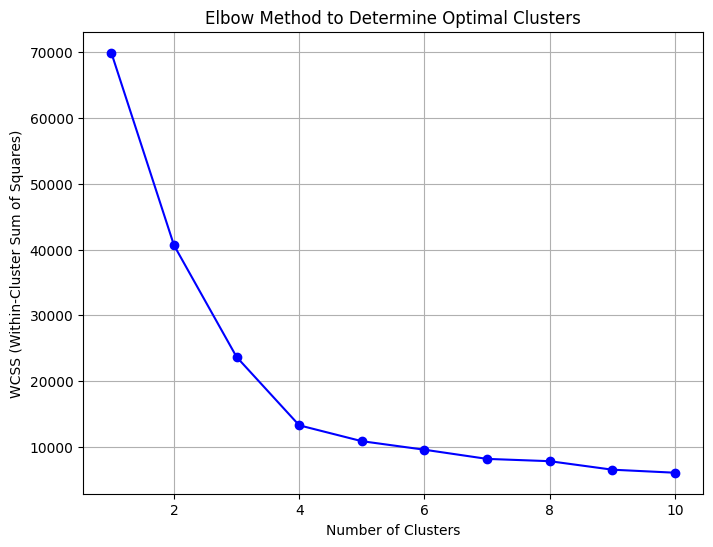

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
cluster_range = range(1, 11)  # Test a range of 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method to visualize the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()  # Display the plot to visualize the elbow point


In [25]:
# Apply K-means clustering with the optimal number of clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_data_scaled)

# Add the cluster labels to the original data
df['cluster'] = clusters

# Display a sample of the data with cluster labels
df.head()  # Show the first few rows with the assigned cluster labels


,Unnamed: 0,avg_vol_3m,change,company_name,last_price,market_cap,pe_ratio_ttm,percent_change,sector_name,symbol,...,Jan_1_2020,Dec_1_2019,Nov_1_2019,Oct_1_2019,Sep_1_2019,Aug_1_2019,Jul_1_2019,Jun_1_2019,May_1_2019,cluster
0,0,3.424M,-4.39,Berkshire Hathaway Inc.,401.5635,868481433600,9.07,-1.08%,Financial Services,BRK-B,...,224.43,226.50,220.30,212.58,208.02,203.41,205.43,213.17,197.42,2
1,1,8.914M,-1.69,JPMorgan Chase & Co.,191.3900,549689327616,11.55,-0.88%,Financial Services,JPM,...,132.36,139.40,131.76,124.92,117.69,109.86,116.00,111.80,105.96,0
2,2,6.041M,-4.25,Visa Inc.,270.7700,554022469632,30.29,-1.55%,Financial Services,V,...,198.97,187.90,184.51,178.86,172.01,180.82,178.00,173.55,161.33,2
3,3,2.41M,-5.07,Mastercard Incorporated,457.4318,426734485504,38.63,-1.10%,Financial Services,MA,...,315.94,298.59,292.23,276.81,271.57,281.37,272.27,264.53,251.49,2
4,4,40.791M,-0.77,Bank of America Corporation,37.5500,295400964096,12.95,-2.01%,Financial Services,BAC,...,32.83,35.22,33.32,31.27,29.17,27.51,30.68,29.00,26.60,0


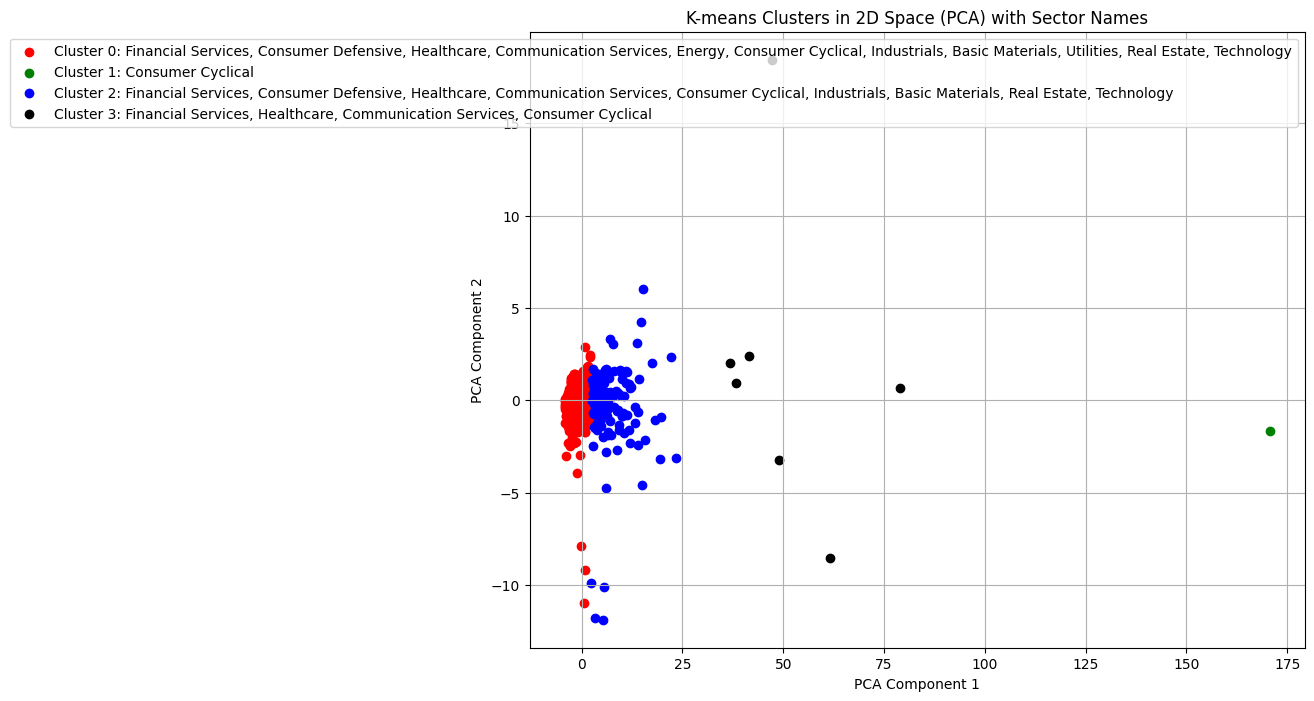

In [26]:
# Reduce dimensions to 2D using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data_scaled)

# Create a DataFrame with the PCA results and cluster labels
cluster_plot_data = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
cluster_plot_data['cluster'] = clusters

# Define color mapping for the clusters (red, green, blue)
cluster_colors = {0: 'red', 1: 'green', 2: 'blue',3:'black'}

# Create scatter plot with cluster colors and sector names
plt.figure(figsize=(10, 8))
for cluster_id in cluster_colors:
    cluster_data = cluster_plot_data[cluster_plot_data['cluster'] == cluster_id]
    sector_names = df.loc[cluster_data.index, 'sector_name'].unique()

    # Scatter plot with the specified color and sector names in the label
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], color=cluster_colors[cluster_id], label=f'Cluster {cluster_id}: {", ".join(sector_names)}')

plt.title('K-means Clusters in 2D Space (PCA) with Sector Names')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()  # Display the scatter plot with cluster colors and sector labels

In [30]:
# Assuming 'cluster' is the column with unique values
unique_clusters = df["cluster"].unique()  # Get unique values in the 'cluster' column

# Loop through unique clusters and print rows for each
for cluster in unique_clusters:
    subset = df[df["cluster"] == cluster]  # Get rows for this cluster
    print(f"\n\nData for cluster {cluster}:")
    print(subset['company_name'].values)  # Print the DataFrame subset



Data for cluster 2:
['Berkshire Hathaway Inc.' 'Visa Inc.' 'Mastercard Incorporated'
 'The Goldman Sachs Group, Inc.' 'S&P Global Inc.' 'CME Group Inc.'
 "Moody's Corporation" 'Aon plc' 'Ameriprise Financial, Inc.'
 'Costco Wholesale Corporation' 'The Estée Lauder Companies Inc.'
 'Constellation Brands, Inc.'
 'Willis Towers Watson Public Limited Company'
 'First Citizens BancShares, Inc.' 'The Hershey Company'
 'Dollar General Corporation' 'Eli Lilly and Company'
 'Erie Indemnity Company' 'UnitedHealth Group Incorporated'
 'Thermo Fisher Scientific Inc.' 'Danaher Corporation' 'Amgen Inc.'
 'Intuitive Surgical, Inc.' 'Stryker Corporation' 'Elevance Health, Inc.'
 'FactSet Research Systems Inc.' 'Everest Group, Ltd.'
 'Coca-Cola Consolidated, Inc.' 'Vertex Pharmaceuticals Incorporated'
 'The Cigna Group' 'Regeneron Pharmaceuticals, Inc.'
 'HCA Healthcare, Inc.' 'McKesson Corporation'
 'Becton, Dickinson and Company' 'Morningstar, Inc.'
 'Kinsale Capital Group, Inc.' 'The Boston Beer C